Số lượng dữ liệu sau khi lọc: 23796


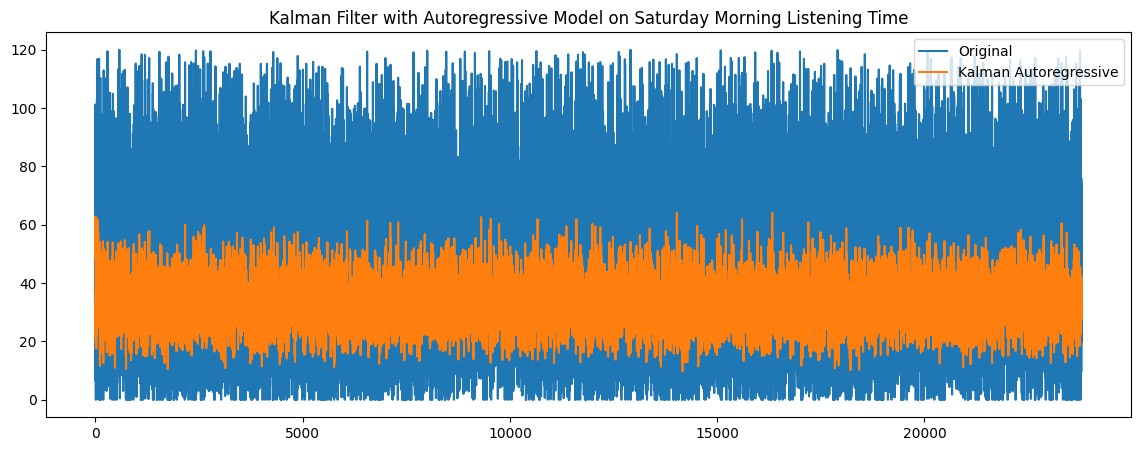

In [27]:
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv(r"D:\time_seris_btap1\playground-series-s5e4\train.csv")
df1 = df[df["Publication_Day"] == "Saturday"]
df1 = df1.drop("id", axis=1)
df2 = df1[df1["Publication_Time"] == "Morning"]
observations = df2['Listening_Time_minutes'].values

filtered_data = df[(df['Publication_Day'] == 'Saturday') & 
                   (df['Publication_Time'] == 'Morning')]
print("Số lượng dữ liệu sau khi lọc:", len(filtered_data))

# Cấu hình Kalman Filter cho mô hình tự hồi quy (AR(1))
phi = 0.9  #
kf = KalmanFilter(
    transition_matrices=[[phi]],
    observation_matrices=[[1]],
    initial_state_mean=[observations[0]],
    initial_state_covariance=[[1]],
    observation_covariance=1,
    transition_covariance=[[0.1]]
)

# Áp dụng Kalman Filter
state_means, _ = kf.filter(observations)

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(observations, label="Original")
plt.plot(state_means.flatten(), label="Kalman Autoregressive")
plt.title("Kalman Filter with Autoregressive Model on Saturday Morning Listening Time")
plt.legend()

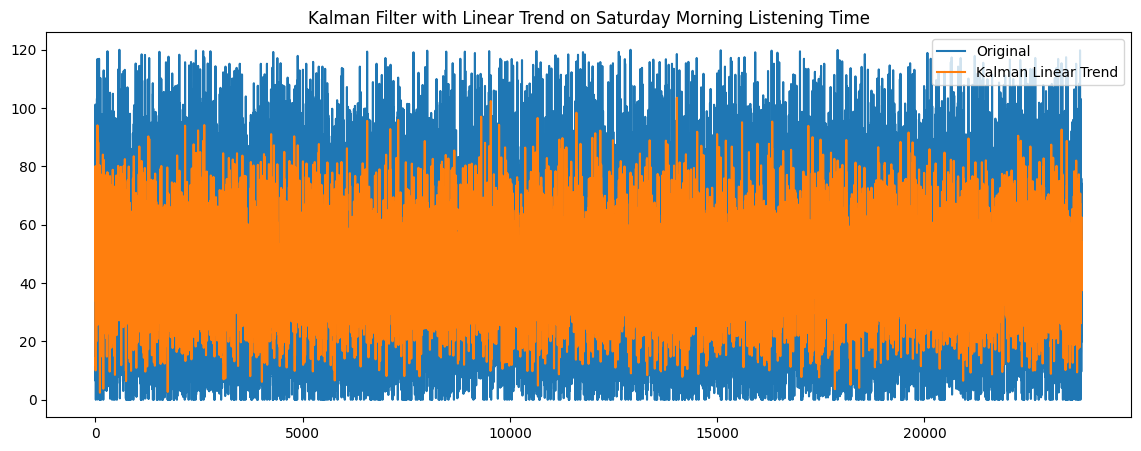

In [ ]:
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv(r"D:\time_seris_btap1\playground-series-s5e4\train.csv")
df1 = df[df["Publication_Day"] == "Saturday"]
df1 = df1.drop("id", axis=1)
df2 = df1[df1["Publication_Time"] == "Morning"]
observations = df2['Listening_Time_minutes'].values

# Cấu hình Kalman Filter cho mô hình xu hướng tuyến tính
kf = KalmanFilter(
    transition_matrices=[[1, 1], [0, 1]],  # Ma trận chuyển tiếp: [level, slope]
    observation_matrices=[[1, 0]],         # Chỉ quan sát level, không quan sát slope
    initial_state_mean=[observations[0], 0],  # Giá trị ban đầu: [level, slope]
    initial_state_covariance=[[1, 0], [0, 1]],  # Độ không chắc chắn ban đầu
    observation_covariance=1,              # Nhiễu phép đo
    transition_covariance=[[0.01, 0], [0, 0.01]]  # Nhiễu chuyển tiếp
)

# Áp dụng Kalman Filter
state_means, _ = kf.filter(observations)

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(observations, label="Original")
plt.plot(state_means[:, 0], label="Kalman Linear Trend")
plt.title("Kalman Filter with Linear Trend on Saturday Morning Listening Time")
plt.legend()

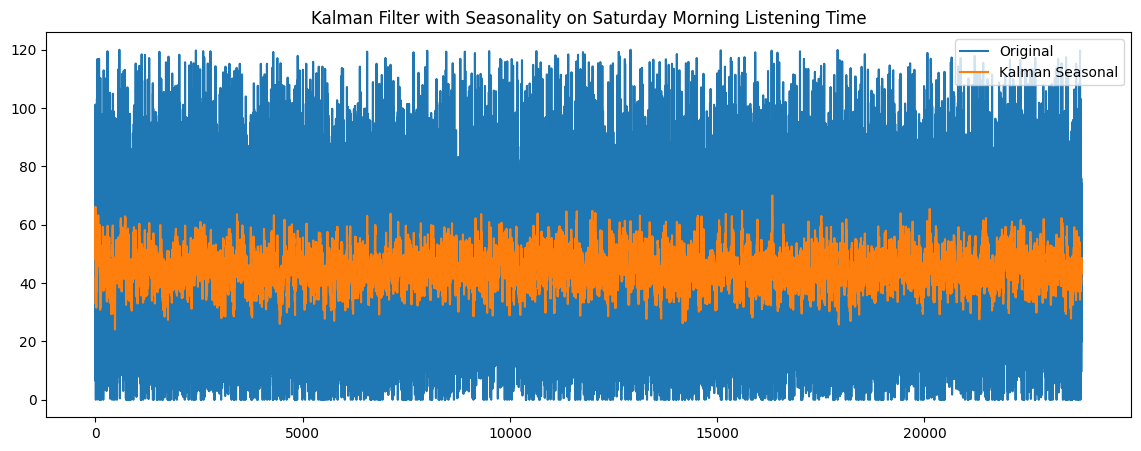

In [ ]:
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv(r"D:\time_seris_btap1\playground-series-s5e4\train.csv")
df1 = df[df["Publication_Day"] == "Saturday"]
df1 = df1.drop("id", axis=1)
df2 = df1[df1["Publication_Time"] == "Morning"]
observations = df2['Listening_Time_minutes'].values

# 1 tháng
seasonal_period = 4
n_states = seasonal_period + 1  # Trạng thái: level + các thành phần mùa vụ

# Cấu hình Kalman Filter cho mô hình mùa vụ
transition_matrix = np.zeros((n_states, n_states))
transition_matrix[0, 0] = 1  # Level không đổi
for i in range(seasonal_period):
    transition_matrix[1 + i, 1 + (i % seasonal_period)] = 1  # Chu kỳ mùa vụ
observation_matrix = np.array([[1] + [0] * seasonal_period])  # Chỉ quan sát level
initial_state_mean = [observations[0]] + [0] * seasonal_period  # Giá trị ban đầu
initial_state_covariance = np.eye(n_states)  # Độ không chắc chắn ban đầu
observation_covariance = 1  # Nhiễu phép đo
transition_covariance = np.eye(n_states) * 0.01  # Nhiễu chuyển tiếp

kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance
)

# Áp dụng Kalman Filter
state_means, _ = kf.filter(observations)

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(observations, label="Original")
plt.plot(state_means[:, 0], label="Kalman Seasonal")
plt.title("Kalman Filter with Seasonality on Saturday Morning Listening Time")
plt.legend()